# CIFAR-10

Student Name 1: Alejandro Francisco Toral

Student Name 2: Enrique Martín López

In [ ]:
# Load CIFAR-10 data set
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


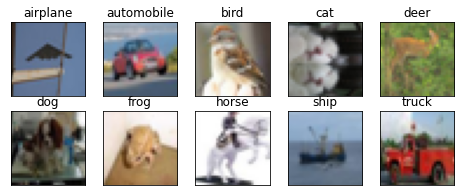

In [ ]:
# Show examples from each class
import numpy as np
import matplotlib.pyplot as plt

num_classes = len(np.unique(y_train))
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    rnd_img = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[rnd_img,::], (0, 1, 2))
    plt.imshow(im)
plt.show()

In [ ]:
# Data pre-processing
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [ ]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1,step=len(model_history.history['accuracy'])/10))
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1,step=len(model_history.history['loss'])/10))
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [ ]:
from keras.initializers import he_uniform
learning_rate = 0.001
layers = [2500,1250,675,125,50]
layer_activation = "relu"

n_epochs = 200
batch_size = 128
my_initializer = he_uniform(seed=None)

d_rate = 0.05

In [ ]:
# Feed forward dense model
# Here it is not allowed to use convolutional layers
# You may use any regularizacion (see class slides)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.regularizers import l2

model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))

for layer in layers:
  model.add(Dense(layers[0], kernel_initializer=my_initializer, activation=layer_activation, kernel_regularizer=l2(0.001))) #
  model.add(BatchNormalization())
  model.add(Dropout(rate=d_rate))
  
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 2500)              7682500   
_________________________________________________________________
batch_normalization (BatchNo (None, 2500)              10000     
_________________________________________________________________
dropout (Dropout)            (None, 2500)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2500)              6252500   
_________________________________________________________________
batch_normalization_1 (Batch (None, 2500)              10000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 2500)              0

In [ ]:
# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epochs, verbose=0, validation_data=(X_test, Y_test))
end = time.time()
print("Training MLP took " + str(end - start) + " seconds")

Training MLP took 918.9792449474335 seconds


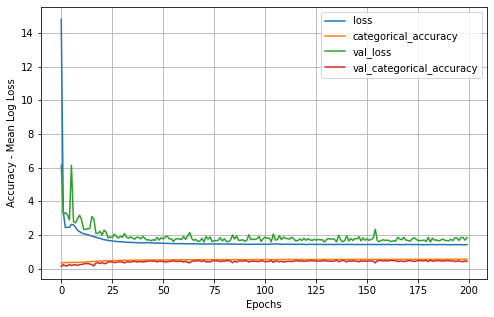

Accuracy  (training):  55.8 %
Accuracy (development test):  42.9 %


In [ ]:
import pandas as pd

results = pd.DataFrame(history.history)
results.plot(figsize = (8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
#plt.gca().set_ylim(0, 1) # set the vertical range to [0,1]

plt.show()

print ("Accuracy  (training): ", 
       round((results.categorical_accuracy.values[-1:][0])*100, 1), "%")
print ("Accuracy (development test): ", 
       round((results.val_categorical_accuracy.values[-1:][0])*100, 1), "%")

In [ ]:
loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

Test loss: 1.8514587879180908
Test accuracy: 0.42890000343322754


Definición de una red convolucional multicapa

In [ ]:
from keras.initializers import he_uniform
learning_rate = 0.001
layer_activation = "relu"
n_epochs = 200
batch_size = 64
my_initializer = he_uniform(seed=None)

d_rate = 0.2

In [ ]:
# Convolutional Neural Network (CNN)
# Here you are allowed to use convolutional layers
# You may use also any regularizacion (see class slides)

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import keras.backend as K

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 3), kernel_regularizer=l2(0.0001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=d_rate))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=d_rate))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=d_rate))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(1, 1), padding='same', kernel_regularizer=l2(0.0001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=d_rate))
model.add(Conv2D(filters=10, kernel_size=(4, 4), padding='valid'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_11 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_13 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_12 (Activation)   (None, 16, 16, 64)       

In [ ]:
# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epochs, verbose=0, validation_data=(X_test, Y_test))
end = time.time()
print("Training MLP took " + str(end - start) + " seconds")

Training MLP took 706.8354434967041 seconds


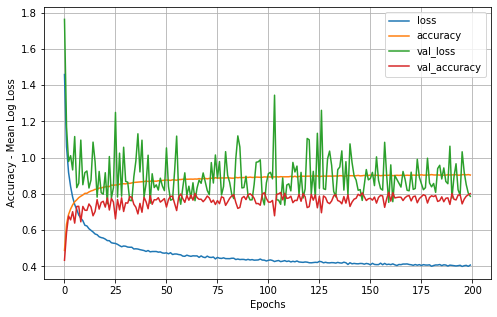

Accuracy  (training):  90.4 %
Accuracy (development test):  80.1 %


In [ ]:
import pandas as pd

results = pd.DataFrame(history.history)
results.plot(figsize = (8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
#plt.gca().set_ylim(0, 1) # set the vertical range to [0,1]

plt.show()

print ("Accuracy  (training): ", 
       round((results.accuracy.values[-1:][0])*100, 1), "%")
print ("Accuracy (development test): ", 
       round((results.val_accuracy.values[-1:][0])*100, 1), "%")

In [ ]:
loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

Test loss: 0.7863554358482361
Test accuracy: 0.8014000058174133
